# **Bem-vindo ao mundo de dados!**



Essa an√°lise √© para voc√™ que possui curiosidade sobre os sal√°rios e caracter√≠sticas dos profissionais de dados mundo a fora.

Iremos explorar diversas quest√µes: a taxa de trabalho remoto, o ano de trabalho, o tipo de contrata√ß√£o, n√≠vel de experi√™ncia, tamanho da empresa, e claro, o **sal√°rio!**

Vamos come√ßar!?

#Bibliotecas

In [ ]:
#Bibliotecas que ser√£o utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

##  Cores

In [ ]:
sns.set_palette("crest")
sns.set_style("whitegrid")

# Importando o dataset

In [ ]:
#Importa√ß√£o do dataset atrav√©s do github
ds_salaries = pd.read_csv("https://raw.githubusercontent.com/gustavo-candidoo/data-science/main/ds_salaries.csv")

##  Dicion√°rio e link dos dados

Link para o dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

work_year: ano de trabalho


experience_level: n√≠vel de experi√™ncia (EN: Entry-Level, MI: Mid-Level,  SE: Senior-Level,  EX: Executive Level)


employment_type: tipo de de emprego (FT: Full-Time, CT: Contract-Time, PT: Part-Time, FL: Freelancer)


job_title: nome do cargo


salary: sal√°rio na moeda local


salary_currency: tipo de moeda do sal√°rio


salary_in_usd: sal√°rio convertido em d√≥lar


employee_residence: local de moradia do empregado


remote_ratio: taxa de trabalho remoto


company_local: local da empresa


company_size: tamanho da empresa (S: small, M: medium, L: large)

# Explorando

In [ ]:
#an√°lise inicial
ds_salaries.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [ ]:
#amostra aleat√≥ria
ds_salaries.sample(5)

Unnamed: 0  work_year experience_level employment_type  \
126         126       2021               SE              FT   
460         460       2022               MI              FT   
243         243       2021               SE              FT   
306         306       2022               SE              FT   
294         294       2022               MI              FT   

                                    job_title  salary salary_currency  \
126                Machine Learning Scientist  120000             USD   
460  Machine Learning Infrastructure Engineer   53000             EUR   
243                            Data Scientist  165000             USD   
306                              Data Analyst  116000             USD   
294                             Data Engineer  170000             USD   

     salary_in_usd employee_residence  remote_ratio company_location  \
126         120000                 US            50               US   
460          58255                 PT            50               PT   
243         165000                 US           100               US   
306         116000                 US             0               US   
294         170000                 US           100               US   

    company_size  
126            S  
460            L  
243            L  
306            M  
294            M

In [ ]:
#verificando o tipo de cada coluna
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
#resumo est√°tistico
ds_salaries.describe()

Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

##  Filtrando

In [ ]:
#podemos dropar algumas colunas que n√£o ser√£o interessantes na nossa an√°lise
#droparemos o ind√≠ce, o local de moradia e da empresa, o sal√°rio e o tipo de moeda do sal√°rio, pois analisaremos somente quanto ganha em d√≥lar
ds_salaries.drop(columns=['Unnamed: 0', 'salary', 'salary_currency', 'employee_residence', 'company_location'], inplace = True)
ds_salaries.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary_in_usd  remote_ratio company_size  
0          79833             0            L  
1         260000             0            S  
2         109024            50            M  
3          20000             0            S  
4         150000            50            L

In [ ]:
#verificando o tamanho
shape = ds_salaries.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas.")

O dataset possui 607 linhas e 7 colunas.


### Valores Missings

In [ ]:
#o dataset n√£o possui missings
ds_salaries.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

#  An√°lise Explorat√≥ria

##  An√°lise Geral

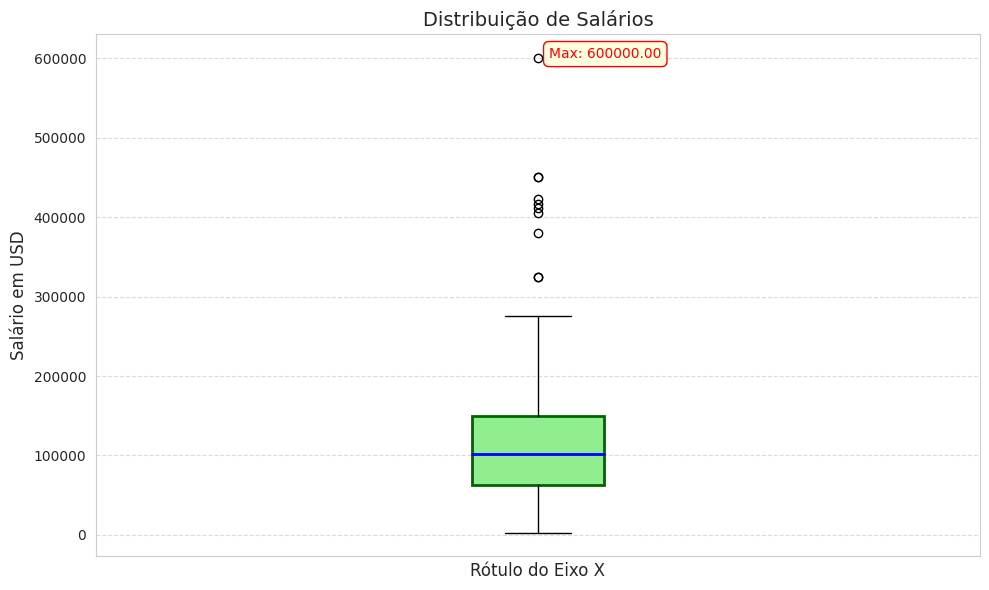

In [ ]:
box_color = 'lightgreen'
median_color = 'blue'
max_value_color = 'red'

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(ds_salaries['salary_in_usd'], patch_artist=True)

for box in boxplot['boxes']:
    box.set(facecolor=box_color, linewidth=2, edgecolor='darkgreen')
for median in boxplot['medians']:
    median.set(color=median_color, linewidth=2)

plt.xlabel("R√≥tulo do Eixo X", fontsize=12)
plt.ylabel("Sal√°rio em USD", fontsize=12)
plt.title("Distribui√ß√£o de Sal√°rios", fontsize=14)

plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks([])

max_salary = ds_salaries['salary_in_usd'].max()

plt.annotate(f'Max: {max_salary:.2f}', xy=(1, max_salary), xytext=(8, 0),
             textcoords='offset points', fontsize=10, color=max_value_color,
             bbox=dict(boxstyle='round,pad=0.4', edgecolor=max_value_color, facecolor='lightyellow'))

plt.tight_layout()

plt.show()




1.   √â poss√≠vel perceber que a mediana dos sal√°rios √© de 100.00USD, ou seja 50% das pessoas ganham acima disso e os outros 50%, abaixo.
2.   H√° alguns valores outlier, por√©m um se destaca, que √© de aproximadamente USD600.000. Podemos explorar e entender.
3. H√° sal√°rios muito baixos em d√≥lar. Provavelmente s√£o de pa√≠ses subdesenvolvidos ou emergentes.


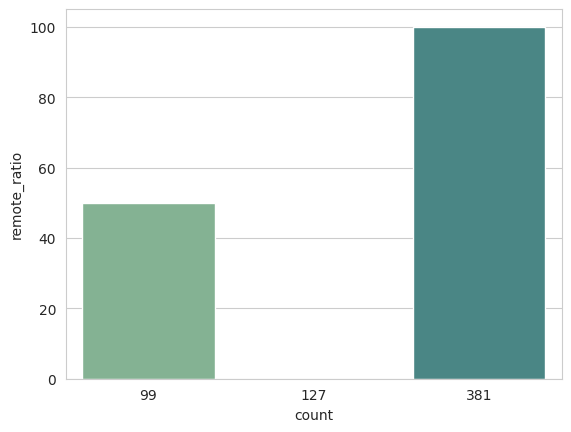

In [ ]:
#dataframe para contar quantas vezes os valores da coluna remote_ratio se repetem
remote_ratio_count = ds_salaries['remote_ratio'].value_counts()
remote_ratio_count = pd.DataFrame(remote_ratio_count).reset_index()
rename = ['remote_ratio', 'count']
remote_ratio_count.columns = rename

sns.barplot(
    data = remote_ratio_count,
    x = 'count',
    y = 'remote_ratio'
)
plt.show()

Percebe-se que a maioria dos indiv√≠duos analisados adotam uma abordagem de trabalho remoto em tempo integral. Em contraste, uma parcela menor opta pelo modelo de trabalho presencial, correspondendo a 0% de home office. Uma por√ß√£o intermedi√°ria dos participantes adota um modelo h√≠brido, dividindo igualmente suas responsabilidades entre trabalho presencial e remoto, totalizando 50%. Essa variedade de pr√°ticas reflete as diversas abordagens que as pessoas t√™m adotado em resposta √†s mudan√ßas no ambiente de trabalho moderno.

### Outlier

In [ ]:
#explorando os outliers, valores acima de ~USD300.000
ds_salary_outlier = ds_salaries[ds_salaries['salary_in_usd'] > 300000]
ds_salary_outlier

work_year experience_level employment_type  \
25        2020               EX              FT   
33        2020               MI              FT   
63        2020               SE              FT   
97        2021               MI              FT   
157       2021               MI              FT   
225       2021               EX              CT   
252       2021               EX              FT   
482       2022               EX              FT   
519       2022               SE              FT   
523       2022               SE              FT   

                              job_title  salary_in_usd  remote_ratio  \
25             Director of Data Science         325000           100   
33                   Research Scientist         450000             0   
63                       Data Scientist         412000           100   
97               Financial Data Analyst         450000           100   
157  Applied Machine Learning Scientist         423000            50   
225            Principal Data Scientist         416000           100   
252             Principal Data Engineer         600000           100   
482                       Data Engineer         324000           100   
519              Applied Data Scientist         380000           100   
523                 Data Analytics Lead         405000           100   

    company_size  
25             L  
33             M  
63             L  
97             L  
157            L  
225            S  
252            L  
482            M  
519            L  
523            L

üò± Podemos ver que o respons√°vel pelo sal√°rio de USD600.000 √© um executivo e engenheiro de dados principal de uma empresa grande e trabalha 100% remoto.

üí≤ Enquanto os outros outliers tamb√©m trabalham remotamente, em sua maioria, em empresas m√©dia e grandes. Quanto ao n√≠vel de experi√™ncia, √© bem diversificado, com alguns mid-level e nenhum entry-level, mas predominando senior-level e executive-level.


##  Pergunta de neg√≥cio



*   Quais s√£o os maiores sal√°rios? E os menores?
*   Durante os anos, o sal√°rios aumentou? Ou diminuiu?
*   An√°lise de correla√ß√£o com o sal√°rio.
*   Como a propor√ß√£o do trabalho remoto afetou o sal√°rio ao longo dos anos?



### Maiores e menores sal√°rios

In [ ]:
#agrupar por cargo e aplicar a mediana na coluna sal√°rio
ds_salaries_median = ds_salaries.groupby("job_title")['salary_in_usd'].median()
ds_salaries_median = pd.DataFrame(ds_salaries_median).reset_index()

In [ ]:
#filtrar os top10 maiores sal√°rios
top_10_salaries = ds_salaries_median.nlargest(10, 'salary_in_usd')
top_10_salaries.head(10)

job_title  salary_in_usd
14       Data Analytics Lead       405000.0
28    Financial Data Analyst       275000.0
29              Head of Data       200000.0
45   Principal Data Engineer       200000.0
16            Data Architect       180000.0
2         Analytics Engineer       179850.0
46  Principal Data Scientist       173762.0
25  Director of Data Science       168000.0
23           Data Specialist       165000.0
3     Applied Data Scientist       157000.0

In [ ]:
#plot do gr√°fico com as 10 maiores m√©dias salariais
fig = px.bar(top_10_salaries,
             y='job_title',
             x='salary_in_usd',
             orientation='h',
             title='Top 10 cargos com maior m√©dia salarial'
             )

fig.update_yaxes(autorange="reversed")

fig.show()

√â poss√≠vel perceber que os maiores sal√°rios s√£o para cargos de gest√£o, o que n√£o reflete muito bem a realidade, pois a maioria dos profissionais de dados est√£o no operacional. √â necess√°rio fazer uma an√°lise mais pr√°tica e voltada para a massa.

In [ ]:
#filtrar os top10 menores sal√°rios
bottom_10_salaries = ds_salaries_median.nsmallest(10, 'salary_in_usd').sort_values(by='salary_in_usd', ascending=True)
bottom_10_salaries.head(10)

job_title  salary_in_usd
0              3D Computer Vision Researcher         5409.0
47                      Product Data Analyst        13036.0
10                  Computer Vision Engineer        26304.5
43                              NLP Engineer        37236.0
7                          Big Data Engineer        41305.5
1                               AI Scientist        45896.0
26                             ETL Developer        54957.0
4         Applied Machine Learning Scientist        56700.0
39  Machine Learning Infrastructure Engineer        58255.0
20                     Data Science Engineer        60000.0

In [ ]:
#plot do gr√°fico com as 10 menores m√©dias salariais
fig = px.bar(bottom_10_salaries,
             y='job_title',
             x='salary_in_usd',
             orientation='h',
             title='Top 10 cargos com menores m√©dias salariais'
             )

fig.update_yaxes(autorange="reversed")

fig.show()

Agora √© poss√≠vel ver uma an√°lise mais realista, com profiss√µes mais comuns praticadas por profissionais da √°rea. No entanto, por ser mais frequente, existem diversos freelancers, o que ocasiona sal√°rios mais baixos, ao contr√°rio dos cargos de gest√£o, em que s√£o full time e em raros casos, outro tipo de contrato de trabalho, e como visto anteriormente, ter mais experi√™ncia √© uma forte feature para o aumento de sal√°rio.

#### An√°lise salarial das 3 principais profiss√µes

Como um profissional de dados na maioria dos casos ser√° um analista, cientista ou engenheiro, podemos filtrar somente esses tr√™s cargos para fazer uma an√°lise mais detalhada e voltada para realidade.

In [ ]:
#filtrar somente as tr√™s principais profiss√µes
main_jobs = ["Data Scientist", "Data Analyst", "Data Engineer"]
ds_main_jobs = ds_salaries[ds_salaries['job_title'].isin(main_jobs)]

In [ ]:
#dataframe das tr√™s principais profiss√µes
ds_main_jobs = pd.DataFrame(ds_main_jobs).reset_index()
ds_main_jobs.head()

index  work_year experience_level employment_type       job_title  \
0      0       2020               MI              FT  Data Scientist   
1      5       2020               EN              FT    Data Analyst   
2      7       2020               MI              FT  Data Scientist   
3     10       2020               EN              FT  Data Scientist   
4     11       2020               MI              FT  Data Scientist   

   salary_in_usd  remote_ratio company_size  
0          79833             0            L  
1          72000           100            L  
2          35735            50            L  
3          51321             0            S  
4          40481             0            L

In [ ]:
#mediana salarial das tr√™s principais profiss√µes
ds_median_main_jobs = ds_main_jobs.groupby("job_title")['salary_in_usd'].median()
ds_median_main_jobs = pd.DataFrame(ds_median_main_jobs).reset_index()

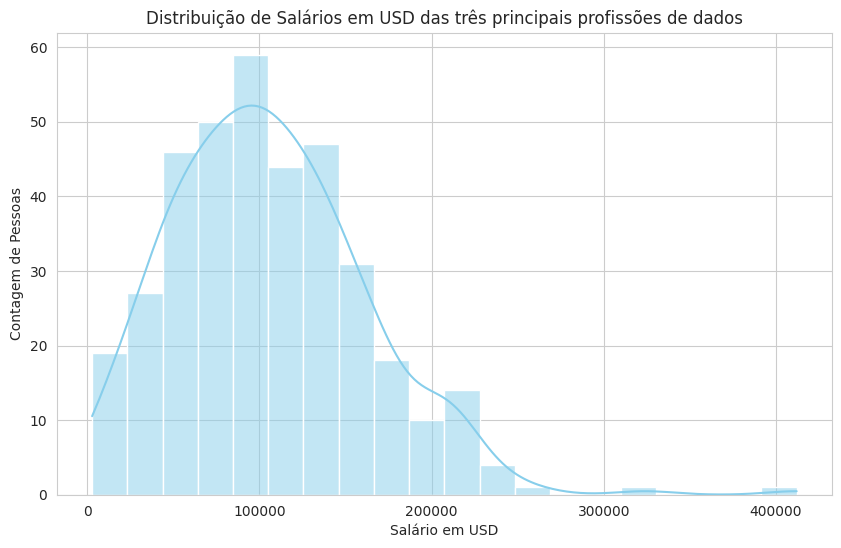

In [ ]:
#histograma do sal√°rio das tr√™s principais profiss√µes
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=ds_main_jobs, x='salary_in_usd', bins=20, kde=True, color='skyblue')

plt.title('Distribui√ß√£o de Sal√°rios em USD das tr√™s principais profiss√µes de dados')
plt.xlabel('Sal√°rio em USD')
plt.ylabel('Contagem de Pessoas')

plt.show()

O histograma apresenta uma distribui√ß√£o normal com forte concentra√ß√£o nos USD100.000, que √© o sal√°rio m√©dio das tr√™s profiss√µes. H√° diversos profissionais ganhando menos, provavelmente freelancers e colaboradores de empresas pequenas. E do outro lado, alguns outliers acima da m√©dia.

### An√°lise temporal do sal√°rio

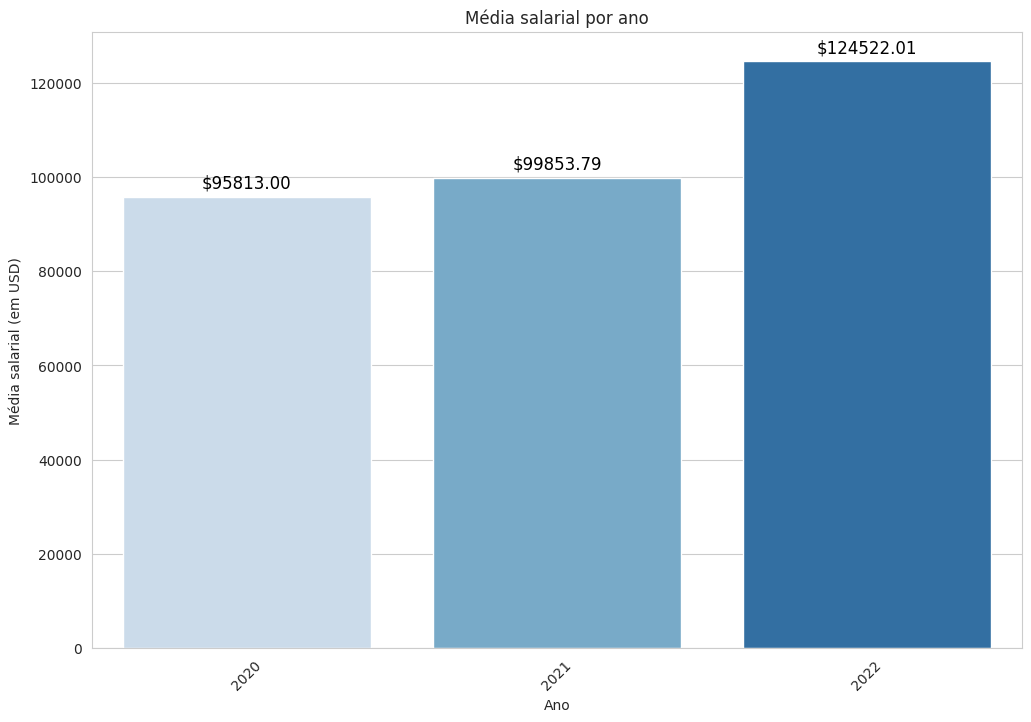

In [ ]:
#m√©dia salarial por ano
mean_salaries_work_year = ds_salaries.groupby("work_year")['salary_in_usd'].mean()
mean_salaries_work_year = pd.DataFrame(mean_salaries_work_year).reset_index()

#plot do gr√°fico
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=mean_salaries_work_year, x='work_year', y='salary_in_usd', palette='Blues')

for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.ylabel("M√©dia salarial (em USD)")
plt.xlabel("Ano")
plt.title("M√©dia salarial por ano")
plt.xticks(rotation=45)
plt.show()

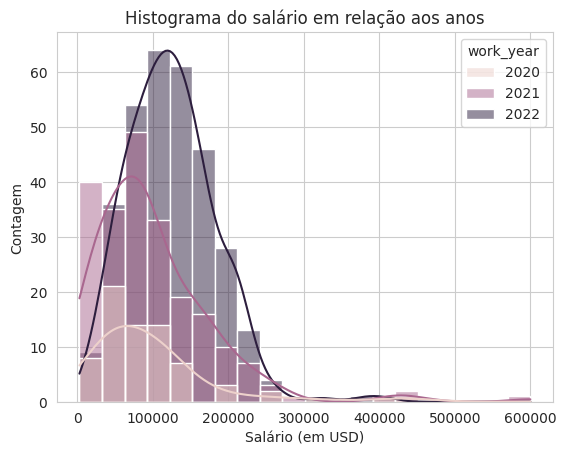

In [ ]:
#histograma do sal√°rio x contagem de sal√°rios por ano
sns.histplot(data=ds_salaries, x='salary_in_usd', hue='work_year', bins=20, kde=True, common_norm=False)

plt.title("Histograma do sal√°rio em rela√ß√£o aos anos")
plt.xlabel("Sal√°rio (em USD)")
plt.ylabel("Contagem")

plt.show()


Analisando o histograma salarial ao longo dos anos, √© evidente um aumento m√©dio de sal√°rios. Notavelmente, a diferen√ßa entre 2022 e 2021 √© significativa, indicando uma melhoria substancial no mercado de trabalho. A transi√ß√£o de 2020 para 2021 mostrou uma diferen√ßa menor, sugerindo estabilidade nesse per√≠odo.

### An√°lise de Correla√ß√£o

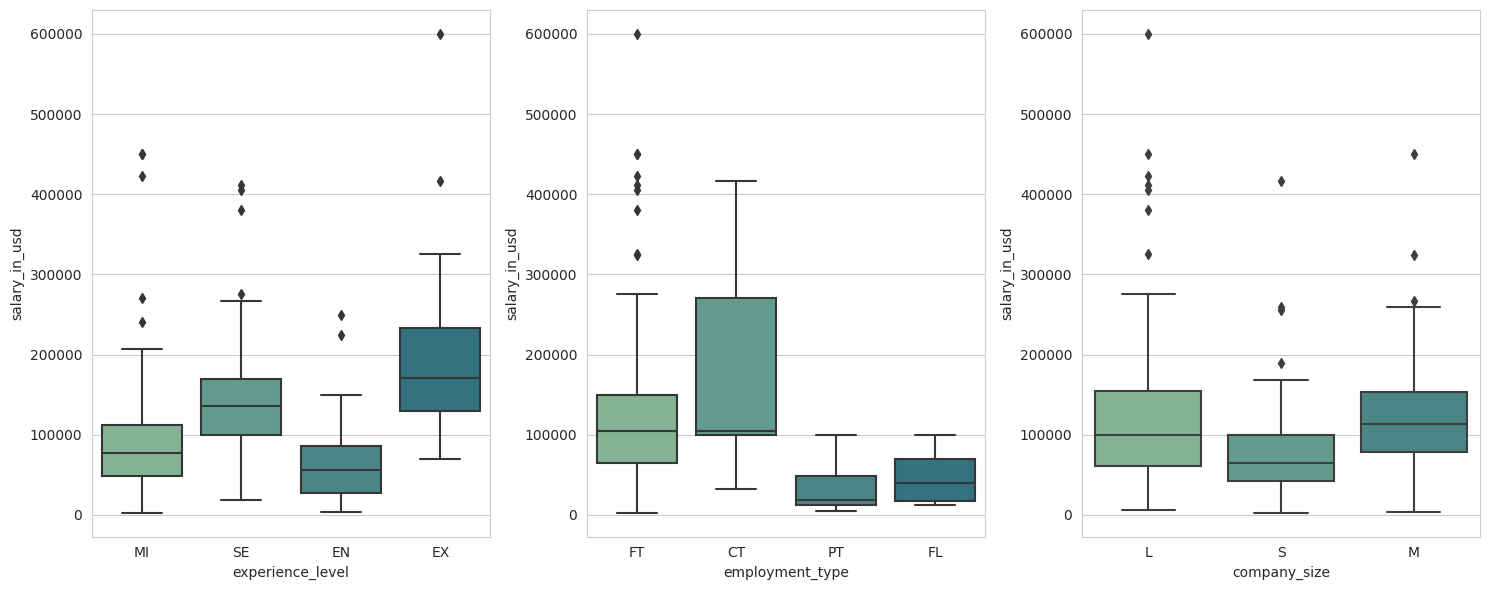

In [ ]:
#boxplot para verificar a rela√ß√£o do sal√°rio x features
fig, ax = plt.subplots(1,3, figsize=(15,6))
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='experience_level', ax=ax[0])
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='employment_type', ax=ax[1])
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='company_size', ax=ax[2])
plt.tight_layout()

1. Sal√°rio e n√≠vel de experi√™ncia: √â poss√≠vel perceber que o sal√°rio tende aumentar conforme a qualifa√ß√£o aumenta, como era de se esperar. 50% dos profissionais entry-level ganham em torno de USD60.000, enquanto experienced-level ganham aproximadamente USD170.000.
2. Sal√°rio e tipo de emprego: Colabores full time e contract time possuem medianas parecidas, com uma dispers√£o muito maior de profissionais full time. Part time e free lance tendem a ganhar menos.
3. Sal√°rio e tamanho da empresa: Profissionais que trabalham em empresa de tamanho m√©dio e grande tendem a ganhar sal√°rio parecidos. J√° em empresa pequena, h√° uma queda no sal√°rio.

### Trabalho Remoto

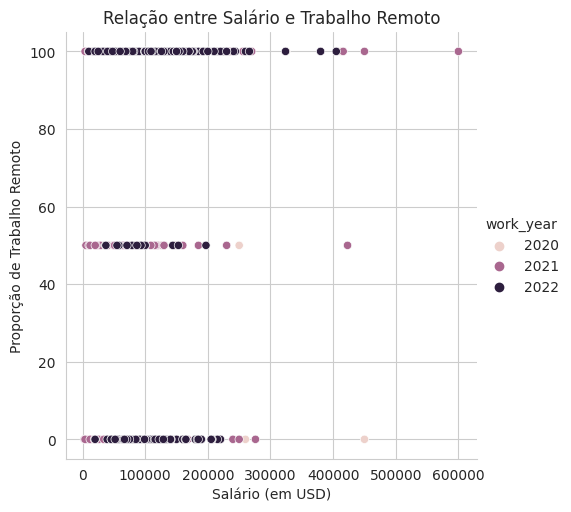

In [ ]:
#gr√°fico para verificar a rela√ß√£o entre a taxa de trabalho remoto, ano de trabalho e o sal√°rio.
ds_salaries_remote_year = ds_salaries.drop(columns=['experience_level', 'employment_type', 'job_title'])

sns.relplot(
    data=ds_salaries_remote_year,
    x='salary_in_usd',
    y='remote_ratio',
    hue='work_year'
)


plt.xlabel("Sal√°rio (em USD)")
plt.ylabel("Propor√ß√£o de Trabalho Remoto")
plt.title("Rela√ß√£o entre Sal√°rio e Trabalho Remoto")

plt.show()

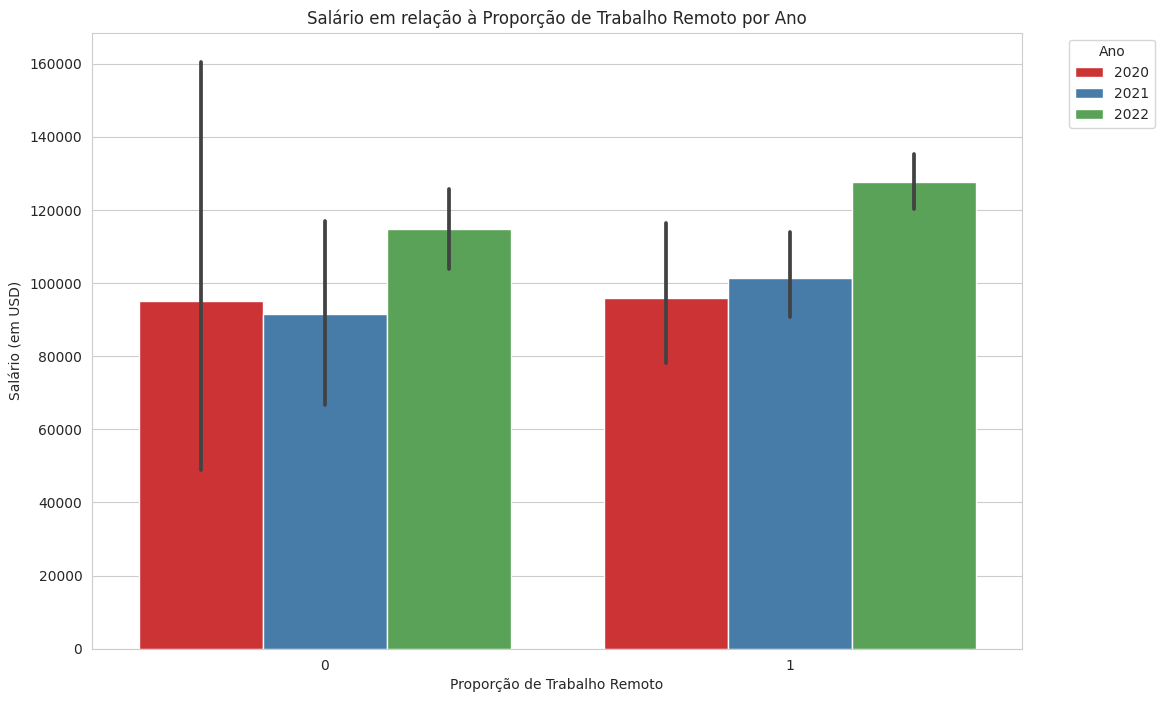

In [ ]:
#gr√°fico mais apresent√°vel para verificar a rela√ß√£o entre trabalho remoto, ano de trabalho e sal√°rio
ds_salaries['remote_ratio'] = np.where(ds_salaries['remote_ratio'] > 0, 1, 0)

plt.figure(figsize=(12, 8))
sns.barplot(data=ds_salaries, x='remote_ratio', y='salary_in_usd', hue='work_year', palette='Set1')

plt.xlabel("Propor√ß√£o de Trabalho Remoto")
plt.ylabel("Sal√°rio (em USD)")
plt.title("Sal√°rio em rela√ß√£o √† Propor√ß√£o de Trabalho Remoto por Ano")

plt.legend(title="Ano", loc="upper right", bbox_to_anchor=(1.15, 1))

plt.show()

Em 2022, observamos o ano com a mais alta taxa de trabalho remoto, marcando um ponto alto nessa tend√™ncia. Esse aumento significativo representa uma not√°vel mudan√ßa nas din√¢micas do mercado de trabalho em compara√ß√£o a anos anteriores. No per√≠odo de 2020 a 2022 houve uma not√°vel crescente na ado√ß√£o do trabalho remoto, refletindo a adapta√ß√£o das empresas √†s novas realidades e demandas, assim como a busca por maior flexibilidade por parte dos profissionais. Essa transforma√ß√£o profunda est√° moldando a forma como as organiza√ß√µes operam e como os indiv√≠duos conduzem suas carreiras.

# Conclus√£o

![Imagem de exemplo](https://blog.bighouseweb.com.br/wp-content/uploads/2022/01/Linguagens-de-programacao-1140x660.jpg)

**A an√°lise revelou uma influ√™ncia direta do sal√°rio de um profissional de dados em rela√ß√£o a todos os fatores considerados. Ficou evidente que as vari√°veis como experi√™ncia, tipo de emprego, t√≠tulo da fun√ß√£o, ano e at√© mesmo a propor√ß√£o de trabalho remoto t√™m um impacto consider√°vel nas remunera√ß√µes.**

**A m√©dia salarial de aproximadamente 100 mil d√≥lares anuais para as principais profiss√µes destaca a atratividade da carreira em ci√™ncia de dados, sendo uma recompensa justa pelo conjunto de habilidades exigido e pela capacidade de alavancar dados para tomar decis√µes estrat√©gicas. Al√©m disso, h√° uma demanda crescente na √°rea.**

**A tend√™ncia crescente do trabalho remoto n√£o passou despercebida. O aumento nas taxas de trabalho remoto ao longo dos anos mostra que a flexibilidade geogr√°fica se tornou uma norma e uma expectativa crescente. Isso n√£o apenas amplia as oportunidades para profissionais de dados, mas tamb√©m est√° redefinindo a forma como as organiza√ß√µes estruturam suas opera√ß√µes e como os talentos buscam equil√≠brio entre vida pessoal e profissional.**

**Em resumo, a carreira em ci√™ncia de dados √© recompensadora e din√¢mica, com sal√°rios atraentes e uma forte tend√™ncia de trabalho remoto. Aqueles que buscam essa √°rea est√£o em uma posi√ß√£o privilegiada para moldar o futuro dos neg√≥cios e da tecnologia por meio da an√°lise de dados.**